# Regression Analysis
Learning from Imbalanced Insurance Data

In [300]:
# import standard libraries & objects
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# from sklearn.preprocessing import StandardScaler

# from statsmodels.stats.outliers_influence \
#      import variance_inflation_factor as VIF
# from statsmodels.stats.anova import anova_lm

from scipy.stats import skew, probplot

# pip install imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Understanding the Dataset

In [219]:
# load the CSV file into a dataframe
df = pd.read_csv('G:/DSI/team_project/data/raw/aug_train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


In [220]:
# basic information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB
None


In [221]:
# summary statistic
print(df.describe())

                  id            Age  Driving_License    Region_Code  \
count  382154.000000  382154.000000    382154.000000  382154.000000   
mean   234392.953477      38.545691         0.998108      26.406867   
std    139527.487326      15.226897         0.043455      13.181241   
min         1.000000      20.000000         0.000000       0.000000   
25%    115006.250000      25.000000         1.000000      15.000000   
50%    230461.500000      36.000000         1.000000      28.000000   
75%    345434.750000      49.000000         1.000000      35.000000   
max    508145.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       382154.000000   382154.000000         382154.000000   
mean             0.489182    30711.271362            111.939812   
std              0.499884    17061.595532             54.286511   
min              0.000000     2630.000000              1.000000   
25%              0.000000

In [222]:
# dropped column
df = df.drop(['id'], axis=1)

In [223]:
# convert integer and float columns to objects
df = df.astype({'Driving_License': 'object',
                'Region_Code' : 'object',
                 'Previously_Insured' : 'object',
                 'Policy_Sales_Channel' : 'object',
                 'Response' : 'object'})

In [224]:
# generate descriptive statistics for categorical columns (object type) in the dataframe
df.describe(include=['O'])

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
count,382154,382154,382154.0,382154,382154,382154,382154.0,382154
unique,2,2,53.0,2,3,2,156.0,2
top,Male,1,28.0,0,1-2 Year,No,152.0,0
freq,205603,381431,107199.0,195211,200176,198501,137422.0,319553


## Exploratory Data Analysis

In [248]:
# convert categorical columns to dummy variables and ensure the dummy variables are integers (0 and 1)
df_with_dummies = pd.get_dummies(df).astype(int)
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Columns: 225 entries, Age to Response_1
dtypes: int32(225)
memory usage: 328.0 MB


The histogram below shows the frequency of observations for 3 integer variables (Age, Annual_Premium and Vintage). 

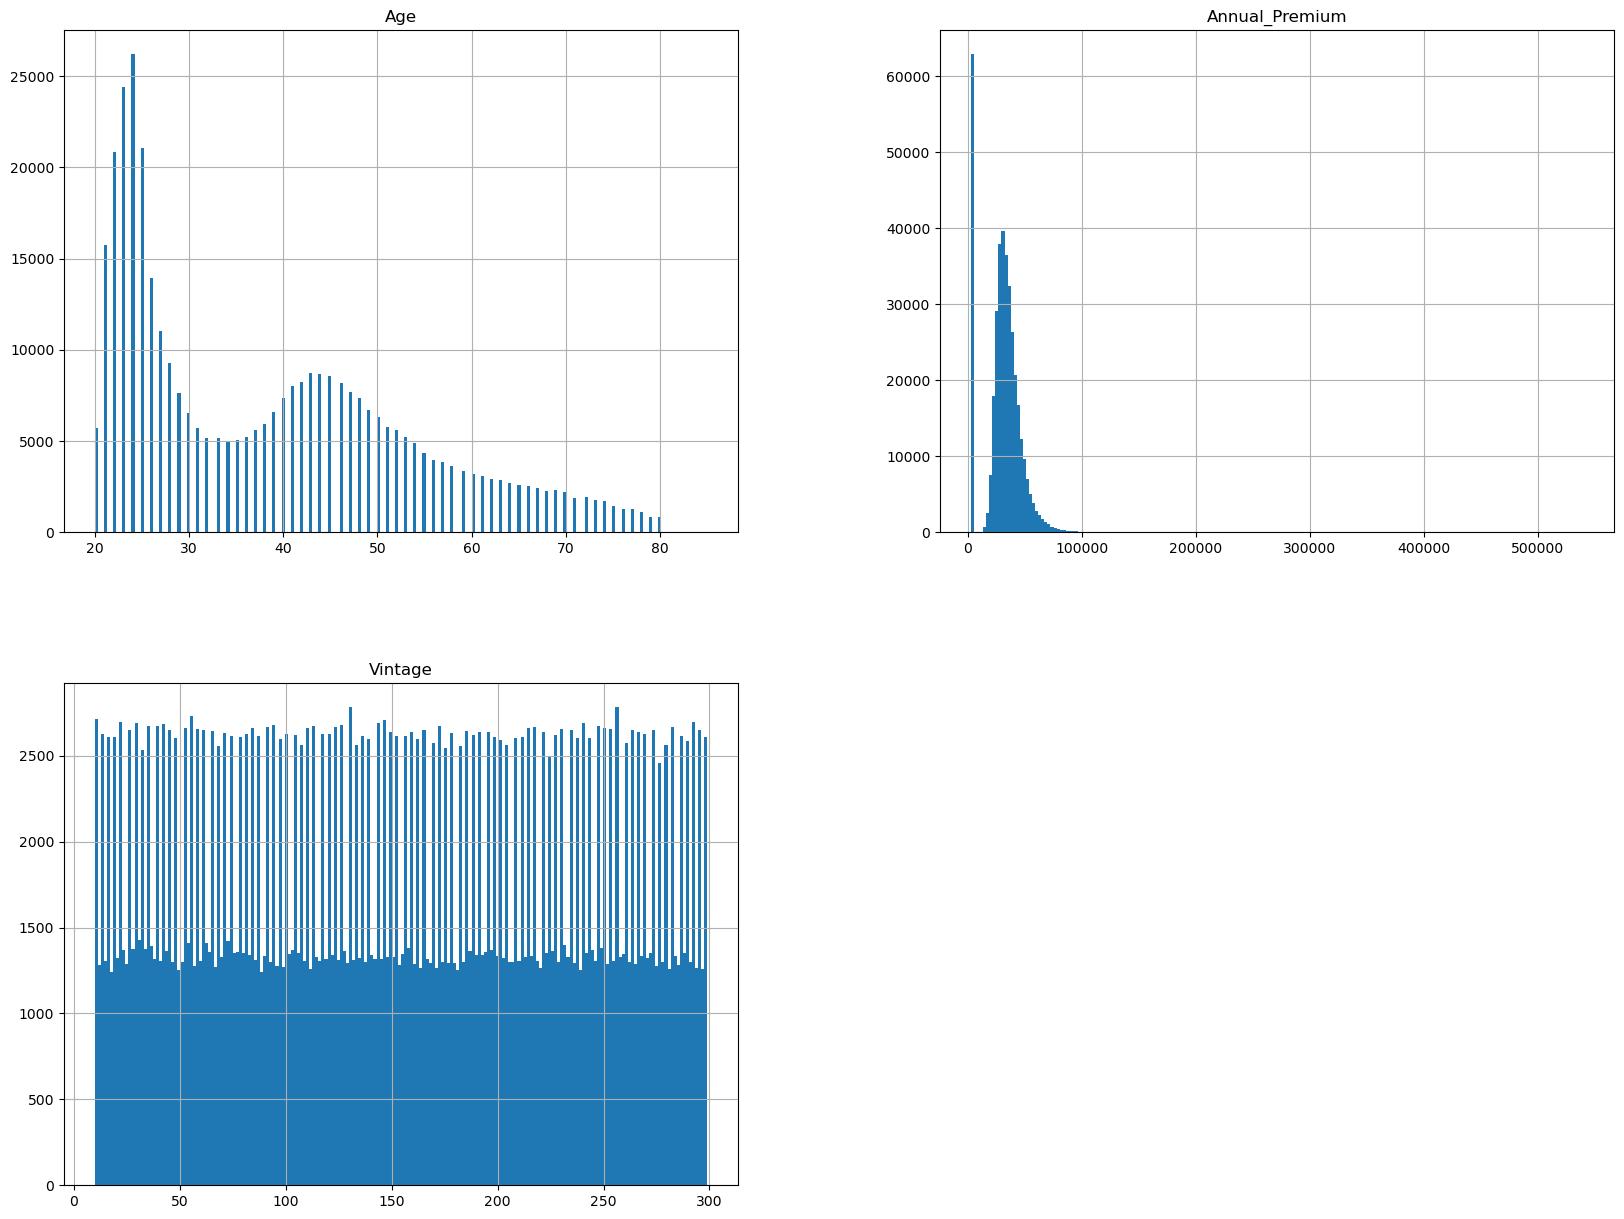

In [249]:
# distribution of all integer fetures
df.hist(bins=200, figsize=(20, 15))
plt.show()

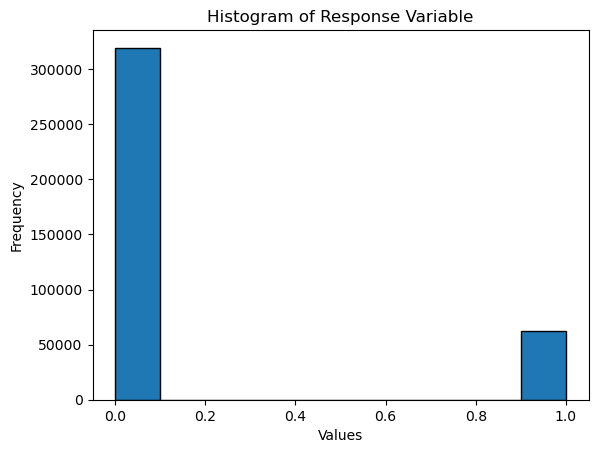

In [284]:
# plot histogram for Response variable
plt.hist(df['Response'], bins=10, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Response Variable')
plt.show()

The histogram above shows that class '0' outweighs class '1', indicating that the data is imbalanced.

Boxplot shows below the spread of the data and highlights the outliers. Any points outside the "whiskers" are considered outliers.

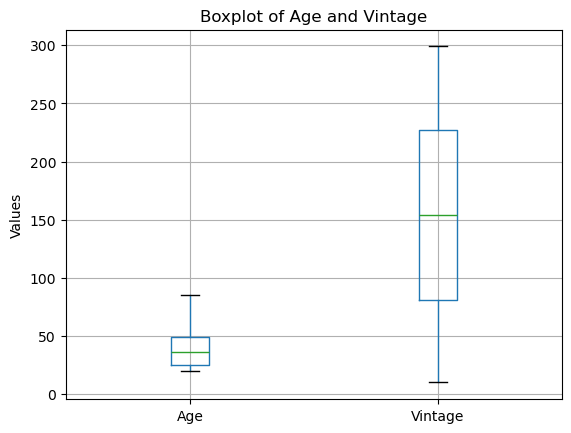

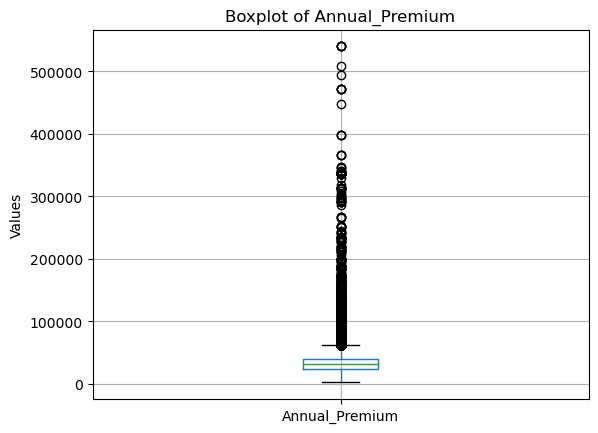

In [250]:
# plotting boxplot for 'Age' and 'Vintage' columns
df_with_dummies[['Age', 'Vintage']].boxplot()
plt.title('Boxplot of Age and Vintage')
plt.ylabel('Values')
plt.show()

# plotting boxplot for 'Annual_Premium' column
df_with_dummies[['Annual_Premium']].boxplot()
plt.title('Boxplot of Annual_Premium')
plt.ylabel('Values')
plt.show()


In [251]:
# check skewness for 'Annual_Premium' before transformation
print("Skewness before transformation:", df_with_dummies['Annual_Premium'].skew())

# log transform the feature to address and resolve skewnesss, adding 1 to avoid log(0)
df_with_dummies['Annual_Premium_Log_Feature'] = np.log(df_with_dummies['Annual_Premium'] + 1)  

# check skewness after transformation
print("Skewness after transformation:", df_with_dummies['Annual_Premium_Log_Feature'].skew())

Skewness before transformation: 1.7204514610105255
Skewness after transformation: -1.5114875806162704


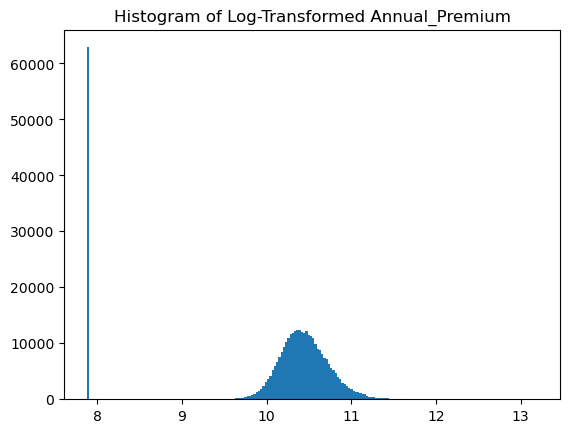

In [252]:
# histogram after transformation for 'Annual_Premium'
plt.hist(df_with_dummies['Annual_Premium_Log_Feature'], bins=200)
plt.title('Histogram of Log-Transformed Annual_Premium')
plt.show()

In [253]:
# check skewness for 'Age' before transformation
print("Skewness before transformation:", df_with_dummies['Age'].skew())

# log transform the feature, adding 1 to avoid log(0)
df_with_dummies['Age_Log_Feature'] = np.log(df_with_dummies['Age'] + 1)  

# check skewness after transformation
print("Skewness after transformation:", df_with_dummies['Age_Log_Feature'].skew())

Skewness before transformation: 0.6968803705160445
Skewness after transformation: 0.22796931297394193


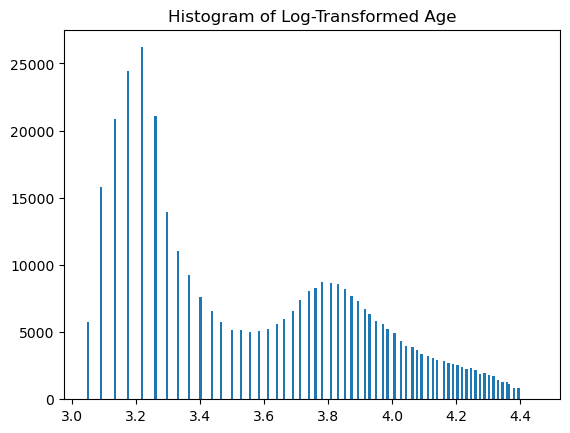

In [254]:
# histogram after transformation for 'Age'
plt.hist(df_with_dummies['Age_Log_Feature'], bins=200)
plt.title('Histogram of Log-Transformed Age')
plt.show()

In [255]:
# drop initial columns after applying the log transform
df_with_dummies = df_with_dummies.drop(columns=['Age', 'Annual_Premium'])

In [258]:
# remove outliers
# calculate quartiles using np.percentile
Q1 = np.percentile(df_with_dummies['Annual_Premium_Log_Feature'], 25)
Q3 = np.percentile(df_with_dummies['Annual_Premium_Log_Feature'], 75)

# calculate IQR
IQR = Q3 - Q1

# define thresholds for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# identify outliers
outliers_iqr = (df_with_dummies['Annual_Premium_Log_Feature'] < lower_threshold) | (df_with_dummies['Annual_Premium_Log_Feature'] > upper_threshold)

# remove outliers
data_cleaned_iqr = df_with_dummies[~outliers_iqr]

print(f"Original data shape: {df_with_dummies.shape}")
print(f"Data shape after removing outliers using IQR: {data_cleaned_iqr.shape}")

Original data shape: (382154, 225)
Data shape after removing outliers using IQR: (316901, 225)


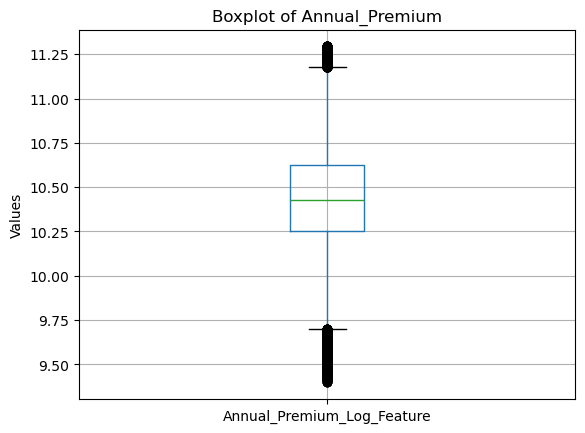

In [260]:
# plotting boxplot for 'Annual_Premium' column after removing outliers

data_cleaned_iqr[['Annual_Premium_Log_Feature']].boxplot()
plt.title('Boxplot of Annual_Premium')
plt.ylabel('Values')
plt.show()

After removing 65,253 outliers from the Annual_Premium column using the current method (Interquartile Range), we still observe the presence of outliers in the data. For the continuation of our analysis, we will proceed with the remaining outliers included in the dataset. If necessary, we can explore alternative outlier detection methods to further refine our outlier removal process.

In [261]:
# calculate correlation matrix and identify variables with strong correlations above the specified threshold
correlation_matrix = data_cleaned_iqr.corr()

threshold = 0.3

strong_correlations = correlation_matrix[abs(correlation_matrix) >= threshold]
strong_correlations = strong_correlations[strong_correlations < 1.0]  # Remove self-correlation

# filter to get a list of variables that have at least one strong correlation
strong_variables = strong_correlations.unstack().dropna().to_frame().index.get_level_values(0).unique()

print("Variables with strong correlations:")
print(strong_variables)

Variables with strong correlations:
Index(['Gender_Female', 'Gender_Male', 'Driving_License_0',
       'Driving_License_1', 'Region_Code_26.0', 'Region_Code_28.0',
       'Region_Code_50.0', 'Previously_Insured_0', 'Previously_Insured_1',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes', 'Policy_Sales_Channel_8.0',
       'Policy_Sales_Channel_22.0', 'Policy_Sales_Channel_26.0',
       'Policy_Sales_Channel_124.0', 'Policy_Sales_Channel_152.0',
       'Response_0', 'Response_1', 'Annual_Premium_Log_Feature',
       'Age_Log_Feature'],
      dtype='object')


We will keep only the above columns that have strong correlation, in the new dataset

In [290]:
# select specific columns from 'data_cleaned_iqr' dataframe
columns = data_cleaned_iqr[['Gender_Female', 'Gender_Male', 'Driving_License_0',
       'Driving_License_1', 'Region_Code_26.0', 'Region_Code_28.0',
       'Region_Code_50.0', 'Previously_Insured_0', 'Previously_Insured_1',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes', 'Policy_Sales_Channel_8.0',
       'Policy_Sales_Channel_22.0', 'Policy_Sales_Channel_26.0',
       'Policy_Sales_Channel_124.0', 'Policy_Sales_Channel_152.0',
       'Response_0', 'Response_1', 'Annual_Premium_Log_Feature',
       'Age_Log_Feature']]

In [291]:
# create a new dataframe 'df_cleaned' using the selected columns
df_cleaned = pd.DataFrame(columns)
df_cleaned

,Gender_Female,Gender_Male,Driving_License_0,Driving_License_1,Region_Code_26.0,Region_Code_28.0,Region_Code_50.0,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,...,Vehicle_Damage_Yes,Policy_Sales_Channel_8.0,Policy_Sales_Channel_22.0,Policy_Sales_Channel_26.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_152.0,Response_0,Response_1,Annual_Premium_Log_Feature,Age_Log_Feature
1,0,1,0,1,0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,10.676554,3.761200
2,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,10.486876,4.204693
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,10.227236,3.135494
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,10.275878,3.367296
5,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,10.238351,3.258097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382148,0,1,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,10.397421,3.871201
382149,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,10.083264,3.218876
382151,0,1,0,1,0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,10.607674,3.828641
382152,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,10.141756,3.367296


In [292]:
# summary information about the DataFrame df_cleaned
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316901 entries, 1 to 382153
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender_Female               316901 non-null  int32  
 1   Gender_Male                 316901 non-null  int32  
 2   Driving_License_0           316901 non-null  int32  
 3   Driving_License_1           316901 non-null  int32  
 4   Region_Code_26.0            316901 non-null  int32  
 5   Region_Code_28.0            316901 non-null  int32  
 6   Region_Code_50.0            316901 non-null  int32  
 7   Previously_Insured_0        316901 non-null  int32  
 8   Previously_Insured_1        316901 non-null  int32  
 9   Vehicle_Age_1-2 Year        316901 non-null  int32  
 10  Vehicle_Age_< 1 Year        316901 non-null  int32  
 11  Vehicle_Damage_No           316901 non-null  int32  
 12  Vehicle_Damage_Yes          316901 non-null  int32  
 13  Policy_Sales_Channe

In [293]:
# dropped column
df_cleaned = df_cleaned.drop(['Response_0'], axis=1)


# Model Building and Evaluation


Predicting whether a health insurance policyholder will be interested in buying vehicle insurance.\
Positive Class: Policyholders interested in buying vehicle insurance.\
Negative Class: Policyholders not interested in buying vehicle insurance.

In [296]:
# prepare feature matrix X by excluding the target variable 'Response_1',
# and target variable y by selecting only 'Response_1'
X = df_cleaned.drop(['Response_1'], axis=1) 
y = df_cleaned[['Response_1']]  

Since the target variable (Response) is imbalanced, we'll use the SMOTE technique to address this issue. SMOTE works effectively with binary variables, so we'll adjust our response variable accordingly. Since the levels of the response variable are mutually exclusive, we'll drop one level, Response_0 in this case.

In [297]:
# split the dataset into training and testing sets, apply SMOTE to balance the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [302]:
# train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# make predictions
y_pred = lr.predict(X_test)

c:\Users\shahr\.conda\envs\dsi_participant\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shahr\.conda\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [301]:
# evaluate the model using SMOTE for resampling
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.8419557911677001
Precision: 0.5148660582867236
Recall: 0.17286024906107927
F1 Score: 0.25882352941176473
ROC AUC: 0.5709597229384401


Will use undersampling method to see if the performance of the model increase.

In [303]:
# importing RandomUnderSampler for undersampling the majority class
from imblearn.under_sampling import RandomUnderSampler

In [304]:
# prepare feature matrix X_US by excluding the target variable 'Response_1',
# and prepare target variable y_US by selecting only 'Response_1'
X_US = df_cleaned.drop(['Response_1'], axis=1) 
y_US = df_cleaned[['Response_1']]

In [305]:
# instantiate RandomUnderSampler for undersampling the majority class,
# and resample the training set using RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_train_resampled_US, y_train_resampled_US = under_sampler.fit_resample(X_train, y_train)

In [306]:
# train the model
lr = LogisticRegression()
lr.fit(X_train_resampled_US, y_train_resampled_US)

# make predictions
y_pred = lr.predict(X_test)

c:\Users\shahr\.conda\envs\dsi_participant\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shahr\.conda\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [307]:
# evaluate the model using undersampling
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.7581451854656759
Precision: 0.39245469930243115
Recall: 0.9397114054160901
F1 Score: 0.5536759353617703
ROC AUC: 0.8316828622747237


Results after Undersampling:

Accuracy: 0.7581\
Precision: 0.3925\
Recall: 0.9397\
F1 Score: 0.5537\
ROC AUC: 0.8317

Previous Results after SMOTE:

Accuracy: 0.8419\
Precision: 0.5149\
Recall: 0.1729\
F1 Score: 0.2588\
ROC AUC: 0.5710

# Comparison and Interpretation:

Undersampling shows higher recall and F1 score but lower accuracy and precision compared to SMOTE.

SMOTE has better accuracy and precision but suffers from very low recall and F1 score.


# Business Implications:

Undersampling shows higher recall and F1 score but lower accuracy and precision compared to SMOTE.
SMOTE has better accuracy and precision but suffers from very low recall and F1 score.

# Conclusion & Suggestions for Improvemnet:

Undersampling is preferable when the goal is to capture as many potential buyers as possible, despite a higher false positive rate.
SMOTE is better when it’s crucial to reduce false positives, even if it means missing many actual buyers.

The current model shows varying performance based on different resampling methods. While undersampling achieves high recall, SMOTE offers better precision and accuracy. However, there's room for improvement in both approaches. We may try different resampling methods, perform thorough outlier removal, and use feature engineering to improve the performance of the model.